<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 4*

# 📝 Assignment


# Breast Cancer Clustering



## 1. 아래의 주소를 참조하여, 데이터를 `df`에 준비하세요.

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

- Feature마다 scale이 다르기 때문에 `StandardScaler`를 적용해야합니다.
- 이후,  "diagnosis"에 있는 label 데이터를 따로 `label`이라는 변수로 생성하세요.
- "diagnosis"를 제거한 나머지 데이터를 사용하여 k-means clustering을 하며, 
- `n_clusters = 2`, `random_state = 42`를 제외한 다른 parameter는 default option을 사용합니다.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from google.colab import files

In [2]:
myfile = files.upload() 

Saving data.csv to data.csv


In [101]:
df = pd.read_csv('data.csv')
df = df.dropna(axis=1)
label = df['diagnosis'] 
df = df.loc[:, 'radius_mean':'fractal_dimension_worst']
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [93]:
def scaler_to_kmeans(x, component):
  scaler = StandardScaler()
  df = pd.DataFrame(scaler.fit_transform(x))
  
  kmeans = KMeans(n_clusters=component, random_state=42).fit(df)
  label2 = pd.DataFrame(kmeans.labels_)

  return label2

label2 = scaler_to_kmeans(df, 2)
label2

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


## 2. 원래 데이터의 label과, clustering 이후의 라벨을 비교하여 accuracy를 측정하고 결과를 `Acc`에 저장하세요. 

- Acc = 전체 데이터 중 라벨이 일치하는 데이터 수 입니다.

ex)

|원래 라벨|cluster 이후 label|
|:-:|:-:|
|A|A|
|A|B|
|A|A|
|B|B|
|B|B|
|B|A|

accuracy = $(2 + 2) \over 6$

이때 아래의 코드를 참고하여 `0`과 `1`로 있는데이터를 `M`과 `B`로 바꿔서 작업하면 좋습니다. 

```python
label2 = label2.replace(0,'M')
label2 = label2.replace(1,'B')
```

In [99]:
# 이곳에 답안을 작성하시기 바랍니다
label2 = label2.replace(0,'M')
label2 = label2.replace(1,'B')
label2 = pd.DataFrame(label2)
label2

,0
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [95]:
compare_clust = pd.concat([label, label2], axis=1)
compare_clust.columns = ['원래라벨', 'cluster 이후 label']
compare_clust

,원래라벨,cluster 이후 label
0,M,M
1,M,M
2,M,M
3,M,M
4,M,M
...,...,...
564,M,M
565,M,M
566,M,M
567,M,M


In [96]:
#크기 비교
def comparing(dat):
  count = 0
  dat.columns = ['원래라벨', 'cluster 이후 label']
  for i in range(len(dat)):
    if dat.iloc[i]['원래라벨'] == dat.iloc[i]['cluster 이후 label']:
      count += 1
  Acc = count/len(dat)
  return Acc

In [97]:
round(comparing(compare_clust), 4)

0.9104

In [9]:
#앞에 과정 간단하게 처리 하는 함수
from sklearn.metrics import accuracy_score
Acc = accuracy_score(label, label2)
round(Acc, 4)

0.9104

# 🔥 도전 과제

아래 링크를 참조하여 hierarchical clustering을 breast cancer dataset에 적용하고, 그 결과를 시각화하세요.

<https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering>


1 : ward, 2 : complete, 3: average, 4 : single
그림 유형을 알려주세요. : 1


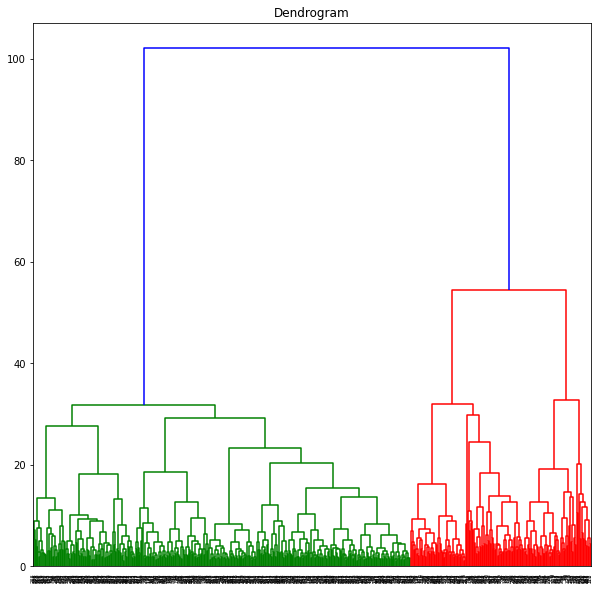

In [104]:
# 이곳에 답안을 작성하시기 바랍니다
from scipy.cluster.hierarchy import dendrogram, linkage

df1 = pd.read_csv('data.csv')

class mech:
  def scaler(self, x):
    feature = df1.loc[:, 'radius_mean':'fractal_dimension_worst']
    feature_columns = feature.columns.tolist()
    label = df1['diagnosis']
    scaler = StandardScaler()
    scaler_one = pd.DataFrame(scaler.fit_transform(feature), columns = feature_columns)
    scaler_one.insert(0, 'diagnosis', label)
    return scaler_one
  
  def myDendro(self, df):
    link_dic = {1 : 'ward', 2 : 'complete', 3: 'average', 4 : 'single'}
    print('1 : ward, 2 : complete, 3: average, 4 : single')
    ans = input('그림 유형을 알려주세요. : ')
    link = link_dic[int(ans)]
    data = df_scaled.drop('diagnosis', axis=1)
    feature_linkage = linkage(data, method = link)
    plt.figure(figsize=(10, 10))
    plt.title("Dendrogram")
    dendrogram(feature_linkage)
    plt.show()

chal = mech()

df_scaled = chal.scaler(df1)

chal.myDendro(df_scaled)